In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm

from src.plotting_template import interactive_curve

# Chapter 2. Probability Theory for Thermodynamics

```{admonition} Relevant readings and preparation
:class: note

**Concept in Thermal Physics:** Chapters 3.1-3.8, (*pg. 20-28*)

```{admonition} Learning Outcomes
:class: tip

After studying this section, students should be able to:

- Distinguish between **discrete** and **continuous** probability distributions, and describe examples of each in physical contexts.
- Define and calculate the **variance** and **standard deviation** of a distribution.
- Understand how **linear transformations** affect the mean and variance of a random variable.
- Describe the properties and applications of the **binomial distribution** in modelling discrete physical events.
- Recognise the difference between **independent** and **dependent** probabilities, and compute joint or conditional probabilities accordingly.
- Apply **Bayes’ theorem** to update probabilities in light of new evidence.
- Identify and use the **normal (Gaussian) distribution** as an approximation to many natural phenomena.
- Describe the **Poisson distribution** and its relevance to counting statistics and random thermal events.

Reality is filled with uncertainty. Every action or decision we take must be made with incomplete information, since the chain of events leading to an outcome is often so complex that the exact result is unpredictable. Nevertheless, we can still act with quantifiable confidence in an uncertain world. Incomplete information is better than none at all, for example - it is more useful to know that there is a 20% chance of rain tomorrow than to have no forecast whatsoever. Probability is the mathematical framework that allows us to quantify uncertainty, and it is ubiquitous across all fields of scientific study, alongside finance sectors, software development, politics and so forth.


Probability theory has had an undeniably strong impact in furthering our understanding of thermal physics. This is because we often study systems containing a practically uncountable number of particles, where indiviual atomic behaviour is unpredictable but collective behaviour is remarkably regular. On macroscopic scales, probabilistic predictions become suitably precise. Measureable quantities such as temperature or pressure emerge as averages over many atomic contribtions. Although each atom behaves differently, and tracking all atoms' individual motions and collisions is an unfeasible feat, the ensemble's average behaviour follows well-defined probability distribitions, allowing us to perceive and model system behaviour without complete knowledge.


Before we delve into the basics of probability theory, we establish a few definitions:

- Probabilities are non-negative numbers which take values between 0 and 1.

- For a given scenario, all possible outcomes of that scenario form a set of events, with each outcome having an associated probability.

- If an outcome is not part of this set, its probability of occurring is zero.

- If the event is certain, the probability of it occurring is one.

- Events are considered 'mutually exclusive' if they cannot occur simultaneously.

- The sum of probabilities for all mutually exclusive outcomes must equal one for a valid probability distribution.

## Discrete and Continuous probability distributions

### Discrete Distributions

Discrete random variables can only take a finite number of values. The classic example of which is the humble six-sided die, which has a set of outcomes: {1, 2, 3, 4, 5, 6}. If we denote $x$ a **discrete random variable** which takes values (i.e. outcomes) $x_i$ with corresponding probability $P_i$, we can make a few definitions which encapsulate the properties of discrete distributions.

First, we require that the sum of probabilities for every possible value of a discrete random variable equate to one:
$$\sum_{i} P_{i} = 1$$;

we then define the arithmetic mean as the expected value of x, denoted:
$$\langle x \rangle = \sum_i x_i P_i.$$

Intuitively, the idea is that for each possible outcome you adjust it's contribution to the sum by its probability of occurance. This is called "weighting". Were you to sample many many times, add all the outcomes you obtained and divide by the number of trials, you would eventually converge to the expected value. It is also possible to define the "mean squared" value of x through a similar procedure:

$$\langle x^2 \rangle = \sum_i x_i^2 P_i.$$

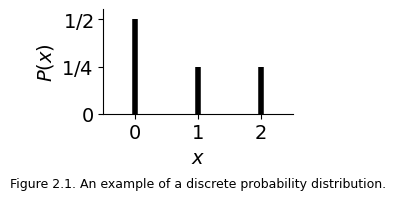

In [6]:
# Example of 3-valued discrete probability distribution.
if True:
    # Discrete values of x and corresponding probabilities
    x = np.array([0, 1, 2])
    P = np.array([1/2, 1/4, 1/4])

    # Create figure
    plt.figure(figsize=(3, 2))

    # Plot as vertical lines
    plt.vlines(x, 0, P, colors='k', lw=4)

    # Axis labels
    plt.xlabel(r"$x$")
    plt.ylabel(r"$P(x)$")

    # Set axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(0, 0.55)

    # Tick positions - relabelling y-axis tick markers.
    plt.xticks([0, 1, 2])
    plt.yticks([0, 0.25, 0.5], [r"$0$", r"$1/4$", r"$1/2$"])

    # Remove top/right spines
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)

    # Add caption
    plt.figtext(0.5, -0.6,
         "Figure 2.1. An example of a discrete probability distribution.",
         ha='center', va='top', fontsize=9, transform=plt.gca().transAxes
    )

    # Show
    plt.tight_layout()
    plt.show()

Do note that the expected value need not be present in the set of outcomes. A common example of this is the average number of children a family is expected to have across a population. These figures are often cited to occur between 1.8-2.4, yet it is only possible to have an integer number of children. These impossible values only make sense when considering a population rather than an individual sample.

#### Example 2.1
Consider a scenario where random variable $x$ can take values {0, 1, 2} with corresponding probabilities {$\frac{1}{2}$, $\frac{1}{4}$, $\frac{1}{4}$}. This distribution is visualised in figure 2.1. Calculate the expected value $\langle x \rangle$ and mean squared $\langle x^2 \rangle$.

#### Solution 2.1
First check that $\sum P_i = 1$. Since $\frac{1}{2} + \frac{1}{4} + \frac{1}{4}$} = 1$ we are good to go. We then calculate the averages as follows:

$$
\begin{align*}
\langle x \rangle &= \sum_i x_i P_i \\
&= 0 \cdot \tfrac{1}{2} + 1 \cdot \tfrac{1}{4} + 2 \cdot \tfrac{1}{4} \\
&= \tfrac{3}{4} = 0.75
\end{align*}
$$

We see that the mean $\langle x \rangle$ is not one of the possible values $x$ can take. We follow a similar process for $\langle x^2 \rangle$:

$$
\begin{align*}
\langle x \rangle &= \sum_i x_i P_i \\
&= 0^2 \cdot \tfrac{1}{2} + 1^2 \cdot \tfrac{1}{4} + 2^2 \cdot \tfrac{1}{4} \\
&= 0 \cdot \tfrac{1}{2} + 1 \cdot \tfrac{1}{4} + 4 \cdot \tfrac{1}{4} \\
&= \tfrac{5}{4} = 1.25
\end{align*}
$$

### Continuous distributions

Let $x$ now be a **continuous random variable**, allowing it to take any value within specified bounds (these bounds could be infinite). We have to treat probabilities slightly differently here. Imagine a uniform distribution which, when sampled, can take any value between 1 and 10. One sample may yield an even 4, another something extremely specific such as 3.1415926535... Since there are infinite values that can be taken in this range, each individual value has effectively zero probability of occurring! Therefore, when calculating probabilities on continuous distributions we consider the probability of a variable having a value between some range $x + dx$.

There are lots of real-life quantities that exist on continuous distributions. Height, commute durations, local temperature... These often have finite bounds, but there are infinite possibilities between them. Nonetheless, we enforce that the total probability of all values is one, however as we are now summing across continuous ranges we replace our sums with integrals:

$$\int P(x)dx = 1.$$

Similarly, we have analogous formulae for $\langle x \rangle$ and $\langle x^2 \rangle$:

$$\langle x \rangle = \int x P(x)dx;$$
$$\langle x^2 \rangle = \int x^2 P(x)dx.$$

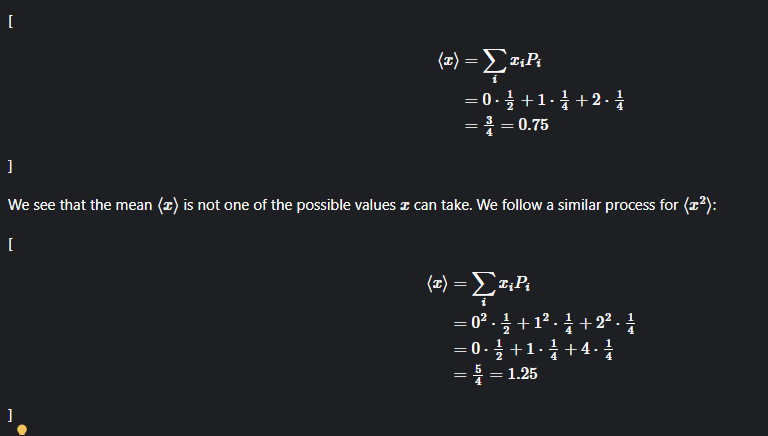

In [3]:
# TODO - AN EXAMPLE WOULD GO WELL HERE

## Measures of Central Tendencies

When describing a probability distribution, we often want to identify simple central values which best represent the properties and sampling behaviour of a probability distribution. These are known as **measures of central tendency**, and the most common are the **mean**, **median**, and **mode**:

- **Mean** ⟨x⟩: the expectation or average value of a distribution.
- **Median**: the value that divides the distribution into two equal halves, i,e. the middle value.
- **Mode**: the most probable value, where the probability is maximal.

For symmetric distributions (like the Gaussian), these three measures coincide onto the same value. For asymmetric or skewed distributions, they differ, and thus provide valuable information for characterising a distribution.

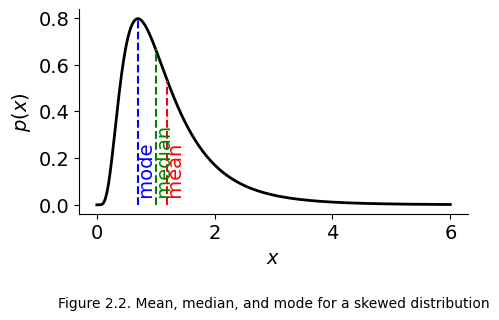

In [4]:
# Skewed distribution for mean, mode and median.
if True:
    # Skewed distribution: lognormal
    dist = lognorm(s=0.6, scale=np.exp(0.0))

    x = np.linspace(0.001, 6, 600)
    y = dist.pdf(x)

    # Measures of central tendencies for plotting vbars.
    mean = dist.mean()
    median = dist.median()
    mode = x[np.argmax(y)]

    plt.figure(figsize=(5, 3))
    plt.plot(x, y, lw=2, color='black')
    plt.vlines(
        [mean, median, mode],
        0,
        [dist.pdf(mean), dist.pdf(median), dist.pdf(mode)],
        linestyles=['--', '--', '--'],
        colors=['r', 'g', 'b'])
    plt.text(mean, 0, " mean", rotation=90, va='bottom', ha='left', color='r')
    plt.text(median, 0, " median", rotation=90, va='bottom', ha='left', color='g')
    plt.text(mode, 0, " mode", rotation=90, va='bottom', ha='left', color='b')

    plt.xlabel(r"$x$")
    plt.ylabel(r"$p(x)$")

    # Add caption
    plt.figtext(0.5, -0.4,
         "Figure 2.2. Mean, median, and mode for a skewed distribution",
         ha='center', va='top', fontsize=10, transform=plt.gca().transAxes
    )
    for spine in ["top", "right"]:
        plt.gca().spines[spine].set_visible(False)
    plt.tight_layout()
    plt.show()

In skewed distributions, like in the positively skewed distribution in Figure 2.2, the mean is pulled towards the distribution's tail whilst the median lies between the mean and mode. Regardless, the mode still represents the most probable value, i.e. the distribution's peak.

### Expectations of a function

The expectation value can be taken with respect to any arbitrary function, $f(x)$:

$$
\mathbb{E}[f(X)] =
\begin{cases}
\displaystyle \sum_i f(x_i)P(x_i), & \text{discrete}\\[6pt]
\displaystyle \int_{-\infty}^{\infty} f(x)p(x)\,dx, & \text{continuous}
\end{cases}
$$


### Variance

The **variance** measures the average deviation of values around the mean of a distribution and is always positive. It is defined as follows:
$$
\mathrm{Var}(X) = \langle (x-⟨x⟩)^2 \rangle
$$

We can expand the above expression to derive a simpler expression for calculating the variance of a scalar variable:

$$
\begin{aligned}
\mathrm{Var}(x)
&= \langle (x - ⟨x⟩)^2 \rangle \\
&= \langle x^2 - 2⟨x⟩x + ⟨x⟩^2 \rangle \\
&= \langle x^2 \rangle - 2⟨x⟩⟨x⟩ + ⟨x⟩^2 \\
&= \langle x^2 \rangle - ⟨x⟩^2.
\end{aligned},
$$

which is often more practical for calculations by hand. This manner of expressing the variance gives rise to a mnemonic expression with which you can memorise the formula - The variance is "the mean of the squares minus the square of the means." The variance is for a variable $x$ is often denoted $\sigma^2_x$, and relates to the **standard deviation**, which is simply the square root of the variance:
$$
\sigma_x = \sqrt{\mathbb{E}\left[(x- \mathbb{E}\left[x\right])^2\right]} = \mathbb{E}\left[x^2\right] - \mathbb{E}\left[x\right]^2
$$

## Linear Transformations

A linear transformation is a mathematical rule which maps one variable onto another through a combination of scaling and shifting. For a scalar it takes the general form $y = ax + b$, where $a$ and $b$ are constants:

- The constant $a$ controls the *scaling* of the variable; how much the values are expanded or compressed.
- The constant $b$ controls the *translation* of the variable; i.e. how far the values are moved up or down the axis.

In graphical terms, if $x$ is represented on the horizontal axis and $y$ on the vertical, the transformation $y = a x + b$ produces a straight line whose slope is $a$ and intercept is $b$.

#### Examples
- Converting **Celsius to Kelvin**: $T_K = T_C + 273.15$ → shift only ($a = 1$, $b = 273.15$).
- Converting **inches to centimetres**: $x \ \text{cm} = x \times 2.54 \ \text{in}$ → scale only ($a = 2.54, b = 0$).
- Converting **Celcius to Fareneheit**: $T_F = (T_C \times 1.8) + 32$ → scale and shift ($a = 1.8$, $b = 32$).

### Expectation under a linear transformation

Because the expectation operator $\langle \cdot \rangle$ is linear, its behaviour on a variable undergoing a linear transformation is simple:
$$
\langle y \rangle = \langle ax \ + \ b \rangle = a \langle x \rangle \ + \ b
$$

This is because the expectation of a product is the product of expectations, and an expectation of sums is a sum of expectations. Broken down further:
$$
\begin{aligned}
\langle y \rangle
&= \mathbb{E}\!\left[ a x + b \right] \\[4pt]
&= \mathbb{E}\!\left[a x\right] + \mathbb{E}\!\left[b\right]
\quad &&\text{(summation rule of expectation)} \\[4pt]
&= \mathbb{E}\!\left[a\right]\mathbb{E}\!\left[x\right] + \mathbb{E}\!\left[b\right]
\quad &&\text{(product rule for constants)} \\[4pt]
&= a\,\mathbb{E}\!\left[x\right] + b \\[4pt]
&= a\,\langle x \rangle + b
\end{aligned}
$$

This is because the expected value of a constant parameter is merely itself. Thus it linearly warps the original expectation.


### Variance under a linear transformation

Variance describes the *spread* of a distribution about its mean.
For a variable $x$ transformed linearly as $y = a x + b$, we can derive how the variance changes.

Starting from the definition,
$$
\mathrm{Var}(y) = \mathbb{E}\left[(y - \langle y \rangle)^2\right]
$$

and substituting $y = a x + b$,

$$
\begin{aligned}
\mathrm{Var}(y)
&= \mathbb{E}\!\left[(a x + b - \mathbb{E}[a x + b])^2\right] \\[4pt]
&= \mathbb{E}\!\left[(a x + b - (a\,\mathbb{E}[x] + b))^2\right]
\quad &&\text{(substitute } \mathbb{E}[a x + b] = a\,\mathbb{E}[x] + b\text{)} \\[4pt]
&= \mathbb{E}\!\left[(a x + \cancel{b} - a\,\mathbb{E}[x] - \cancel{b})^2\right]
\quad &&\text{(constants cancel)} \\[4pt]
&= \mathbb{E}\!\left[(a(x - \mathbb{E}[x]))^2\right] \\[4pt]
&= a^2\,\mathbb{E}\!\left[(x - \mathbb{E}[x])^2\right]
\quad &&\text{(constant factor rule)} \\[4pt]
&= a^2\,\mathrm{Var}(x)
\end{aligned}
$$

The additive constant $b$ cancels out because it merely shifts the entire distribution without changing its spread.
The multiplicative constant $a$ scales the variance by $a^2$, since stretching or compressing the variable by $a$ changes the width of the distribution quadratically. These relationships underpin how measurement uncertainty propagates through unit conversions or calibration - when a physical quantity is scaled by $a$, its variance (and hence uncertainty) scales by $a^2$.


In [5]:
# TODO - Figure is too barebones. Update the plotting script in src/plotting_template.

def linear_model(x, a, b):
    return a * x + b

x = np.linspace(-5, 5, 200)
param_specs = {
    "a": {"init": 1, "min": -3, "max": 3, "step": 0.1},
    "b": {"init": 0, "min": -5, "max": 5, "step": 0.1},
}

interactive_curve(linear_model, x, param_specs, title="Linear Transformation", x_label="x", y_label="y")

FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
              'uid': '0e623138-fc7c-474e-805b-52d9c0283501',
              'x': {'bdata': ('AAAAAAAAFMD3wEbviswTwO6Bjd4VmR' ... '4VmRNA+MBG74rME0AAAAAAAAAUQA=='),
                    'dtype': 'f8'},
              'y': {'bdata': ('AAAAAAAAFMD3wEbviswTwO6Bjd4VmR' ... '4VmRNA+MBG74rME0AAAAAAAAAUQA=='),
                    'dtype': 'f8'}}],
    'layout': {'template': '...',
               'title': {'text': 'Linear Transformation'},
               'xaxis': {'title': {'text': 'x'}},
               'yaxis': {'title': {'text': 'y'}}}
})

(FigureWidget({
     'data': [{'mode': 'lines',
               'type': 'scatter',
               'uid': '0e623138-fc7c-474e-805b-52d9c0283501',
               'x': {'bdata': ('AAAAAAAAFMD3wEbviswTwO6Bjd4VmR' ... '4VmRNA+MBG74rME0AAAAAAAAAUQA=='),
                     'dtype': 'f8'},
               'y': {'bdata': ('AAAAAAAAFMD3wEbviswTwO6Bjd4VmR' ... '4VmRNA+MBG74rME0AAAAAAAAAUQA=='),
                     'dtype': 'f8'}}],
     'layout': {'template': '...',
                'title': {'text': 'Linear Transformation'},
                'xaxis': {'title': {'text': 'x'}},
                'yaxis': {'title': {'text': 'y'}}}
 }),

## Independent Variables in Probability

In many physical problems we deal with more than one random variable. For example, the position and velocity of a molecule, or the outcomes of repeated measurements of the same quantity. Sometimes these values are **independent** of one another, meaning that knowledge of one variable provides no information about the other. A standard example of this is coin flips, knowing the outcome of one coin flip provides no picture on what the necxt flip will yield.

Formally, two random variables $u$ and $v$ are said to be *independent* if their joint probability distributed can be written as a product of their indovividual distributions:
$$
P(u, \ v) = P_u(u) \times P_v(v),
$$

thus the value taken by $u$ does not depend on $v$ and vice versa. This extends for any amount of independent variables, i,e. $\vec{x} \in \mathbb{R}^N$ is described by:
$$
P(\vec{x}) = \prod_{i=1}^N P_i(x_i) = P_1(x_1) \times P_2(x_2) \ \times  \ ...  \ \times P_N(x_N).
$$

A useful consequence of independence is that the expectation value of a product of indepedent variables factorises neatly:
$$
\begin{align}
\mathbb{E}\!\left[uv\right]
  &= \int \!\!\int uv \, P_u(u)P_v(v) \, du\,dv \\[6pt]
  &= \left(\int u \, P_u(u) \, du\right)
     \left(\int v \, P_v(v) \, dv\right) \\[6pt]
  &= \mathbb{E}\!\left[u\right] \, \mathbb{E}\!\left[v\right].
\end{align}
$$

We can achieve this because integrals for indepedent variables can be separated. This implies that the average value for the product of $u$ and $v$ is equal to the product of their average values. Again this can be extended to any arbitrary number of independent variables:
$$
\begin{align}
\mathbb{E}\!\left[\prod_{i=1}^{N} X_i\right]
  &= \int \cdots \int
     \Bigg(\prod_{i=1}^{N} x_i\Bigg)
     \Bigg(\prod_{i=1}^{N} p_i(x_i)\Bigg)
     \, dx_1\cdots dx_N \\[6pt]
  &= \prod_{i=1}^{N} \left(\int x_i\, p_i(x_i)\, dx_i\right) \\[6pt]
  &= \prod_{i=1}^{N} \mathbb{E}\!\left[X_i\right].
\end{align}
$$

The same is true for discrete variables, or even a combination of discrete and continuous variables. Simply replace integral signs with sums for discrete components, but otherwise the product of expectation values is equivalent for these combinations of variable type.

#### Example 2.2

Suppose that there are $n$ indepdent variables, $X_i$, each with the same mean $\langle X \rangle$ and variance $\sigma^2_X$. Let $Y$ be the sum of the random variables, such that $Y = X_1 + X_2 \ + \ ... \ + \ X_n$. Find the mean and variance of Y.

#### Solution 2.2:
The mean of $Y$ is simply the sum of each variable's expectation value. As each variable $X_i$ has the same mean $\langle X \rangle$, we have:
$$
\langle Y \rangle = n \langle X \rangle.
$$

Finding the variance of $Y$ is a marginally more complicated matter. To start, let's refer to the formula $\sigma^2_Y = \langle Y^2 \rangle - \langle Y \rangle^2$. Seeing as we have $\langle Y \rangle^2 = n^2 \langle X \rangle^2$, we only need to calculate \langle Y^2 \rangle:

$$
\begin{align}
\langle Y^{2} \rangle
  &= \langle X_{1}^{2} + \cdots + X_{N}^{2} + X_{1}X_{2} + X_{2}X_{1}
     + X_{1}X_{3} + \cdots \rangle \tag{3.37} \\[6pt]
  &= \langle X_{1}^{2} \rangle + \cdots + \langle X_{N}^{2} \rangle
     + \langle X_{1}X_{2} \rangle + \langle X_{2}X_{1} \rangle
     + \langle X_{1}X_{3} \rangle + \cdots
\end{align}
$$

There are $n$ terms like $\langle X_1^2 \rangle$ on the right-hand side, and n(n-1) terms like $\langle X_1 X_2 \rangle$. The former takes the value $\langle X^2 \rangle$ and the latter $\langle X \rangle \langle X \rangle = \langle X \rangle^2$. Therefore:

$$
\langle Y^{2} \rangle = n\langle X^2 \rangle + n(n-1)\langle X \rangle^2,
$$

and,

$$
\begin{align}
\sigma_y^2
  &= \langle Y^2 \rangle - \langle Y \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle + n(n-1)\langle X \rangle^2 - n^2\langle X \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle + n^2\langle X \rangle^2 - n\langle X \rangle^2 - n^2\langle X \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle - n\langle X \rangle^2 \\[6pt]
  &= n\!\left(\langle X^2 \rangle - \langle X \rangle^2\right) \\[6pt]
  &= n\sigma_X^2
\end{align}
$$

This tells us that if we make $n$ independent measurements of the same quantity, and then take their average via $Y/n$, the uncertainty in that average is reduced by a factor $\sqrt{n}$ compared to a single measurement:
$$
\sigma_{mean} = \frac{\sigma_x}{n}.
$$

# TODO - RMS needs elaboration, cite random walks and possibly Brownian motion.
This principle - that averaging many independent measurements reduces random error - underlies much of experimental physics. However, it is only applicable for random, uncorrelated errors. Any systematic bias in a measurement setup will persist regardless of repetitions. A related idea actually appears in the study of random walks; such as the motion of a particle buffeted by molecules in a fluid. Each step (period of motion) is independent of the last, so whilst the average displacement after many steps is zero, the root-mean-square displacement grows as $sqrt{n}$.

## Combinatorics and the Binomial Distribution

## Conditional Probabilities - Bayes' Theorem

## Key Distributions - Guassian, Poisson, Maxwell-Boltzmann